In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [2]:
data = pd.read_csv("data/pima-indians-diabetes.csv", header=9)
target = data.pop("Diabetes")

In [3]:
keys = ["Glucose", "BloodPressure", "SkinThickness", "SerumInsulin", "BMI"]

In [4]:
for key in keys:
    data.loc[data[key] <= 0., key] = np.nan

In [5]:
data

,Pregnancy,Glucose,BloodPressure,SkinThickness,SerumInsulin,BMI,Pedigree,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47


In [6]:
X = data.values
y = target.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7, stratify=y
)

In [8]:
regressor = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5, weights="distance")),
    #("pca", PCA()),
    ("classifier", LogisticRegression(max_iter=250))
])

In [9]:
regressor.fit(X_train, y_train)

Pipeline(steps=[('imputer', KNNImputer(weights='distance')),
                ('classifier', LogisticRegression(max_iter=250))])

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
regressor.score(X_test, y_test)

0.7857142857142857

In [12]:
accuracy_score(y_test, y_pred)

0.7857142857142857

In [13]:
confusion_matrix(y_test, y_pred)

array([[87, 13],
       [20, 34]], dtype=int64)

In [14]:
y_prob = regressor.predict_proba(X_test)

In [15]:
fpr, tpr, ths = roc_curve(y_test, y_prob[:, 1])

In [16]:
auc(fpr, tpr)

0.8490740740740741

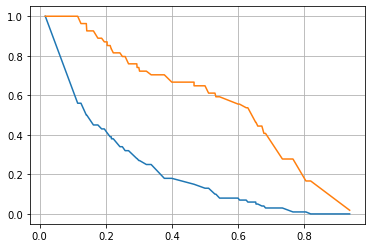

In [17]:
fig, axe = plt.subplots()
axe.plot(ths, fpr)
axe.plot(ths, tpr)
axe.grid()

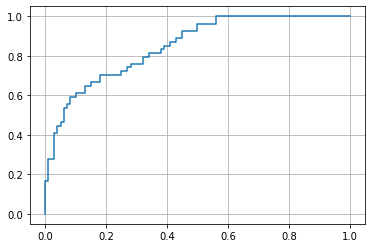

In [18]:
fig, axe = plt.subplots()
axe.plot(fpr, tpr)
axe.grid()